<a href="https://colab.research.google.com/github/UERJ-FISICA/Fisica-Geral/blob/main/Intervalo_de_Confianca_Exclusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

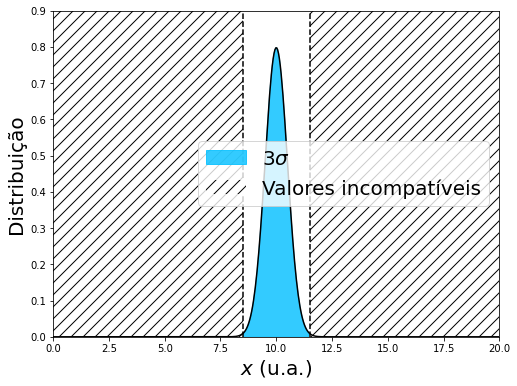

In [2]:
save_figures = False

mean = 10.
sigma = 0.5
x_min = 0.
x_max = 20.
y_max = 0.90

mean_minus_3sigma = ( mean - 3 * sigma )
mean_plus_3sigma = ( mean + 3 * sigma )

rv = norm( loc=mean, scale=sigma )

fig = plt.figure( figsize=(8,6) )
X_ = np.linspace( x_min, x_max, 500 )
X_3sigma_ = X_[ (X_ >= mean_minus_3sigma) & (X_ <= mean_plus_3sigma) ]

plt.plot( X_, rv.pdf( X_ ), 'k-' )
plt.fill( np.concatenate( ( [ X_3sigma_[0] ], X_3sigma_, [ X_3sigma_[-1] ] ) ), np.concatenate( ( [ 0. ], rv.pdf( X_3sigma_ ), [ 0. ] ) ), color="deepskyblue", alpha=0.80, label=r"$3\sigma$" )
plt.axvline( mean_minus_3sigma, color='k', linestyle='--' )
plt.axvline( mean_plus_3sigma, color='k', linestyle='--' )
plt.fill_betweenx( [ 0., y_max ], x_min, mean_minus_3sigma, facecolor='white', hatch='//', label="Valores incompatíveis" )
plt.fill_betweenx( [ 0., y_max ], mean_plus_3sigma, x_max, facecolor='white', hatch='//' )
plt.xlim( x_min, x_max )
plt.ylim( bottom=0., top=y_max )
plt.xlabel( r"$x$ (u.a.)", fontsize=20 )
plt.ylabel( "Distribuição", fontsize=20 )
plt.legend( fontsize=20 )

if save_figures:
    plt.savefig( "distribuicao_areas_exclusao_media_{:.1f}_sigma_{:.1f}.png".format( mean, sigma ), bbox_inches='tight' )
    plt.savefig( "distribuicao_areas_exclusao_media_{:.1f}_sigma_{:.1f}.pdf".format( mean, sigma ), bbox_inches='tight' )
